In [1]:
#REGULAR NEURONS
#14 neurons, connected to Poisson spikegen
name_of_run= "friday"

In [2]:
#!pip install scipy

In [3]:
import samna
import samna.dynapse1 as dyn1
import time

import sys
# change the path to '/home/class_NI2021/ctxctl_contrib' on zemo
sys.path.insert(1, '/home/class_NI2021/ctxctl_contrib')
from Dynapse1Constants import *
import Dynapse1Utils as ut
import NetworkGenerator as n
from NetworkGenerator import Neuron
import numpy as np
from functions import find_max_time,find_min_time,isi_calc,interspike

import matplotlib
# Display plots inline, directly below the cell that produced it.
%matplotlib inline 
import matplotlib.pyplot as plt
import time

# open DYNAP-SE1 board to get Dynapse1Model
device_name = "my_dynapse1"
# change the port numbers to not have conflicts with other groups
store = ut.open_dynapse1(device_name, gui=False, sender_port=119325, receiver_port=632943)
model = getattr(store, device_name)

np.random.seed(77)


/home/nelose/.local/lib/python3.8/site-packages/samna
finished bindings
[0]:  Bus 3 Device 64 Dynapse1DevKit serial_number 00000027
[1]:  Bus 1 Device 66 Dynapse1DevKit serial_number 00000032
[2]:  Bus 1 Device 65 Dynapse1DevKit serial_number 00000000
[3]:  Bus 1 Device 68 Dynapse1DevKit serial_number 00000007
[4]:  Bus 1 Device 67 Dynapse1DevKit serial_number 00000020
[5]:  Bus 1 Device 63 Dynapse1DevKit serial_number 00000033
Sender port: tcp://0.0.0.0:119325
Receiver port: tcp://0.0.0.0:632943
Opened device name: my_dynapse1
SamnaNode ID: 1
PythonNode ID: 2


In [4]:
# Ignore warnings  
#import warnings
#warnings.filterwarnings("ignore",category=UserWarning)

def gen_param_group_1core():
    paramGroup = dyn1.Dynapse1ParameterGroup()
    # THR, gain factor of neurons
    paramGroup.param_map["IF_THR_N"].coarse_value = 5 #5
    paramGroup.param_map["IF_THR_N"].fine_value = 80

    # refactory period of neurons
    paramGroup.param_map["IF_RFR_N"].coarse_value = 4
    paramGroup.param_map["IF_RFR_N"].fine_value = 128

    # leakage of neurons
    paramGroup.param_map["IF_TAU1_N"].coarse_value = 4
    paramGroup.param_map["IF_TAU1_N"].fine_value = 80

    # turn off tau2
    paramGroup.param_map["IF_TAU2_N"].coarse_value = 7
    paramGroup.param_map["IF_TAU2_N"].fine_value = 255

    # turn off DC
    paramGroup.param_map["IF_DC_P"].coarse_value = 0
    paramGroup.param_map["IF_DC_P"].fine_value = 0

    # leakage of AMPA
    paramGroup.param_map["NPDPIE_TAU_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_TAU_F_P"].fine_value = 80

    # gain of AMPA
    paramGroup.param_map["NPDPIE_THR_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_THR_F_P"].fine_value = 80

    # weight of AMPA
    # NOTE: !!!!!!!!!!!!!!!!!!!!!!! remember to set the weight of AMPA !!!!!!!!!!!!!!!!!!!!!!!
    paramGroup.param_map["PS_WEIGHT_EXC_F_N"].coarse_value = 7
    paramGroup.param_map["PS_WEIGHT_EXC_F_N"].fine_value = 250 

    # leakage of NMDA
    paramGroup.param_map["NPDPIE_TAU_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_TAU_S_P"].fine_value = 80

    # gain of NMDA
    paramGroup.param_map["NPDPIE_THR_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_THR_S_P"].fine_value = 80

    # weight of NMDA
    paramGroup.param_map["PS_WEIGHT_EXC_S_N"].coarse_value = 0
    paramGroup.param_map["PS_WEIGHT_EXC_S_N"].fine_value = 0

    # leakage of GABA_A (shunting)
    paramGroup.param_map["NPDPII_TAU_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_TAU_F_P"].fine_value = 80

    # gain of GABA_A (shunting)
    paramGroup.param_map["NPDPII_THR_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_THR_F_P"].fine_value = 80

    # weight of GABA_A (shunting)
    paramGroup.param_map["PS_WEIGHT_INH_F_N"].coarse_value = 0
    paramGroup.param_map["PS_WEIGHT_INH_F_N"].fine_value = 0

    # leakage of GABA_B
    paramGroup.param_map["NPDPII_TAU_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_TAU_S_P"].fine_value = 80

    # gain of GABA_B
    paramGroup.param_map["NPDPII_THR_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_THR_S_P"].fine_value = 80

    # weight of GABA_B
    paramGroup.param_map["PS_WEIGHT_INH_S_N"].coarse_value = 0
    paramGroup.param_map["PS_WEIGHT_INH_S_N"].fine_value = 0

    # other advanced parameters
    paramGroup.param_map["IF_NMDA_N"].coarse_value = 0
    paramGroup.param_map["IF_NMDA_N"].fine_value = 0

    #adaptation parameter 1/4
    paramGroup.param_map["IF_AHTAU_N"].coarse_value = 0
    paramGroup.param_map["IF_AHTAU_N"].fine_value = 0

    #adaptation parameter 2/4
    paramGroup.param_map["IF_AHTHR_N"].coarse_value = 0 #0
    paramGroup.param_map["IF_AHTHR_N"].fine_value = 0 #0

    #adaptation parameter 3/4
    paramGroup.param_map["IF_AHW_P"].coarse_value = 0 #0
    paramGroup.param_map["IF_AHW_P"].fine_value = 0 #0

    #adaptation parameter 4/4
    paramGroup.param_map["IF_CASC_N"].coarse_value = 0 #0
    paramGroup.param_map["IF_CASC_N"].fine_value = 0 #0

    paramGroup.param_map["PULSE_PWLK_P"].coarse_value = 4
    paramGroup.param_map["PULSE_PWLK_P"].fine_value = 106

    paramGroup.param_map["R2R_P"].coarse_value = 3
    paramGroup.param_map["R2R_P"].fine_value = 85

    paramGroup.param_map["IF_BUF_P"].coarse_value = 3
    paramGroup.param_map["IF_BUF_P"].fine_value = 80

    return paramGroup

In [5]:


# set initial (proper) parameters of 16 cores
paramGroup = gen_param_group_1core()
for chip in range(4):
    for core in range(4):
        model.update_parameter_group(paramGroup, chip, core)

In [6]:
#CREATE NETWORK
net_gen = n.NetworkGenerator()
#net_gen.clear_network()
'''
#create spikegens 
schip_r = 0 
score_r = 0 
num_spikegen_r = 14
start_spikegen_id_r = 1
spikegen_ids_r = []
spikegens_r = []
spikegen_r_freq = 100 #in Hz

for id in range(num_spikegen_r):
    spikegen_ids_r.append((schip_r,score_r,start_spikegen_id_r + id))
print("Spikegen for regular indexes:{}".format(spikegen_ids_r))

#spikegens_r is a list of spikegens
for spikegen_id in spikegen_ids_r:
    spikegens_r.append(Neuron(spikegen_id[0],spikegen_id[1],spikegen_id[2],True))

input_freqs_r = np.repeat(spikegen_r_freq,num_spikegen_r)

poisson_gen_r = model.get_poisson_gen()
poisson_gen_r.set_chip_id(schip_r)

# set the input rates for spikegens
for i, sid in enumerate(spikegen_ids_r):
    spikegen_global_id_r = ut.get_global_id(sid[0],sid[1],sid[2])
    poisson_gen_r.write_poisson_rate_hz(spikegen_global_id_r, input_freqs_r[i])
'''

spikegen = Neuron(0,0,1,True)

# select the neurons
chip_r = 0
core_r = 0
num_neurons_r = 14
start_neuron_id_r = 16
neuron_ids_r = []
neurons_r = []

for id in range(num_neurons_r):
    neuron_ids_r.append((chip_r,core_r,start_neuron_id_r + id))
print("Neuron for regular indexes:{}".format(neuron_ids_r))

for neuron_id in neuron_ids_r:
    neurons_r.append(Neuron(neuron_id[0],neuron_id[1],neuron_id[2],False))


#create synapses spikegen-neurons 
for i in range(14):
    net_gen.add_connection(spikegen, neurons_r[i], dyn1.Dynapse1SynType.AMPA)
#default was AMPA, should we change to NMDA? 


# print the network so you can double check (optional)
net_gen.print_network()
# make a dynapse1config using the network
new_config = net_gen.make_dynapse1_configuration()
# apply the configuration
model.apply_configuration(new_config)



Neuron for regular indexes:[(0, 0, 16), (0, 0, 17), (0, 0, 18), (0, 0, 19), (0, 0, 20), (0, 0, 21), (0, 0, 22), (0, 0, 23), (0, 0, 24), (0, 0, 25), (0, 0, 26), (0, 0, 27), (0, 0, 28), (0, 0, 29)]
Post neuron (ChipId,coreId,neuronId): incoming connections [(preNeuron,synapseType), ...]
C0c0n16: [('C0c0s1', 'AMPA')]
C0c0n17: [('C0c0s1', 'AMPA')]
C0c0n18: [('C0c0s1', 'AMPA')]
C0c0n19: [('C0c0s1', 'AMPA')]
C0c0n20: [('C0c0s1', 'AMPA')]
C0c0n21: [('C0c0s1', 'AMPA')]
C0c0n22: [('C0c0s1', 'AMPA')]
C0c0n23: [('C0c0s1', 'AMPA')]
C0c0n24: [('C0c0s1', 'AMPA')]
C0c0n25: [('C0c0s1', 'AMPA')]
C0c0n26: [('C0c0s1', 'AMPA')]
C0c0n27: [('C0c0s1', 'AMPA')]
C0c0n28: [('C0c0s1', 'AMPA')]
C0c0n29: [('C0c0s1', 'AMPA')]
Checking if the given network is valid to be deployed on DYNAP-SE1 chips...
Validation complete: the network is good to go!
Converted the validated network to a Dynapse1 configuration!


In [7]:
from scipy import signal
#Firstly we define the head direciton signal.

#Following the paper of Sadeghi et al., we construct a broadband noise stimuli characterized by a Gaussian 
#distribution of rotational velocities with mean = 0 and std = 20 degrees/s. The Signal is then low-pass filtered at 
#30 Hz.

def gaussian_head_signal(mu, sigma, duration, freq):
    """
    Generates a time series signal of a broadband noise signal characterized by a Gaussian distribution with a 
    certain mean and standard deviation, corresponding to angular velocity. Plots the signal in time
    
    Args: 
        mu (float): mean of the gaussian distribution
        sigma (float): standard deviaiton of gaussian distribution
        duration (np.ndarray): number of time points to sample (s)
        freq (float): frequency boundary for low-pass filter
        
    Returns:
            head_signal (np.ndarray): signal of head direction velocities generated by the gaussian
            head_signal_filtered (np.ndarray): lowpass filtered head velocity signal
            freq_signal_filtered (np.ndarray): lowpass filtered frequency signal
        
    """
    
    
    
    x = np.linspace(0, duration, int(duration*1e3)) 
    head_signal = np.random.normal(mu, sigma*(np.pi/180), int(duration*1e3))#np.random.normal(mu, sigma*(np.pi/180), int(duration*1e3))
    
    
    sos = signal.butter(10, 30, 'lowpass', fs=1000, output='sos')
    freq_signal_filtered = signal.sosfilt(sos, head_signal/(2*np.pi))
    
    
    head_signal_filtered = freq_signal_filtered*(2*np.pi)*(180/np.pi)
    
    plt.figure(figsize=(8, 13))
    
    plt.subplot(211)
    plt.plot(x, head_signal, color='tab:blue')
    plt.title("Unfiltered head velocity stimulus")
    plt.xlabel("time (s)")
    plt.ylabel("rad/s")

    plt.subplot(212)
    plt.plot(x, head_signal_filtered, color='tab:orange')
    plt.title("Filtered head velocity stimulus")
    plt.xlabel("time (s)")
    plt.ylabel("degrees/s")
    
    #plt.subplot(224)
    #plt.plot(x, freq_signal_filtered, color='tab:red')
    
    plt.show()
    
    return head_signal, head_signal_filtered, freq_signal_filtered







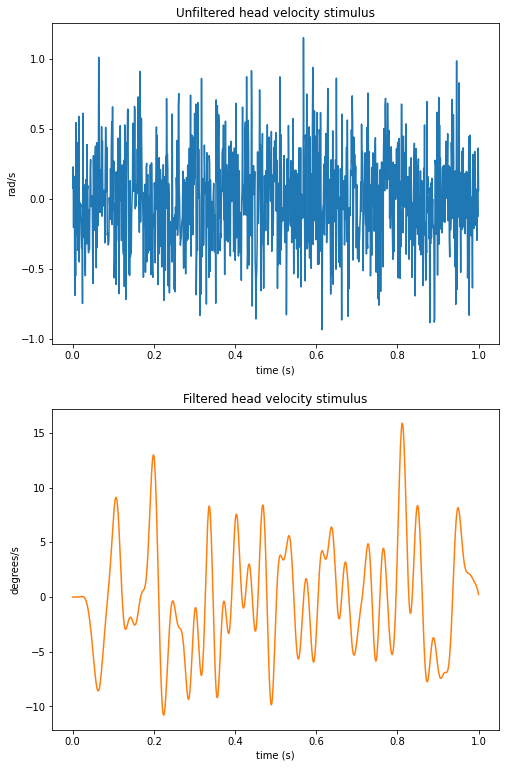

In [8]:
# Now test on mu = 0 and std = 20 deg as stated in the paper
mu = 0
sigma = 20
duration = 1
freq = 30

np.random.seed(77)
head_signal, head_signal_filtered, freq_signal  = gaussian_head_signal(mu, sigma, duration, freq)

In [9]:
def pulse_freq_modulation(signal, carrier_freq):
    
    """
    Given an input signal and a carrier frequency, the pulse frequency modulator returns a set of spikes that encode
    the amplitude of the signal.
    
    Args:
        signal (np.ndarray): analogue signal to encode
        carrier_freq (float): carrier frequency used to multiply the original signal and encode the spikes. Units = Hz
        
    Return:
            spikes (np.ndarray): time series with 1's when there is a spike and 0 otherwise
    """

    modulation_index = 1/np.amax(head_signal_filtered)


    time = np.arange(head_signal_filtered.shape[0]) / head_signal_filtered.shape[0]
    modulator = head_signal_filtered*(modulation_index)
    carrier = np.sin(2.0 * np.pi * carrier_freq * time)
    product = np.zeros_like(modulator)

    for i, t in enumerate(time):
        product[i] = np.sin(2. * np.pi * (carrier_freq * t + modulator[i]))


    spikes = np.where(np.diff(np.sign(product)))[0]    

    #Plot the different signal plots
    
    plt.figure(figsize = (10,20))
    plt.subplot(4, 1, 1)
    plt.plot(modulator)
    plt.ylabel('Amplitude')
    plt.xlabel('Modulator signal')
    
    plt.subplot(4, 1, 2)
    plt.plot(carrier)
    plt.ylabel('Amplitude')
    plt.xlabel('Carrier signal')

    plt.subplot(4, 1, 3)
    plt.plot(product)
    plt.ylabel('Amplitude')
    plt.xlabel('Output signal')


    plt.subplot(4, 1, 4)
    plt.plot(spikes, np.ones((spikes.shape)), ".")
    plt.ylabel('Spikes')
    plt.xlabel('Output signal')
    plt.show()
    
    return spikes

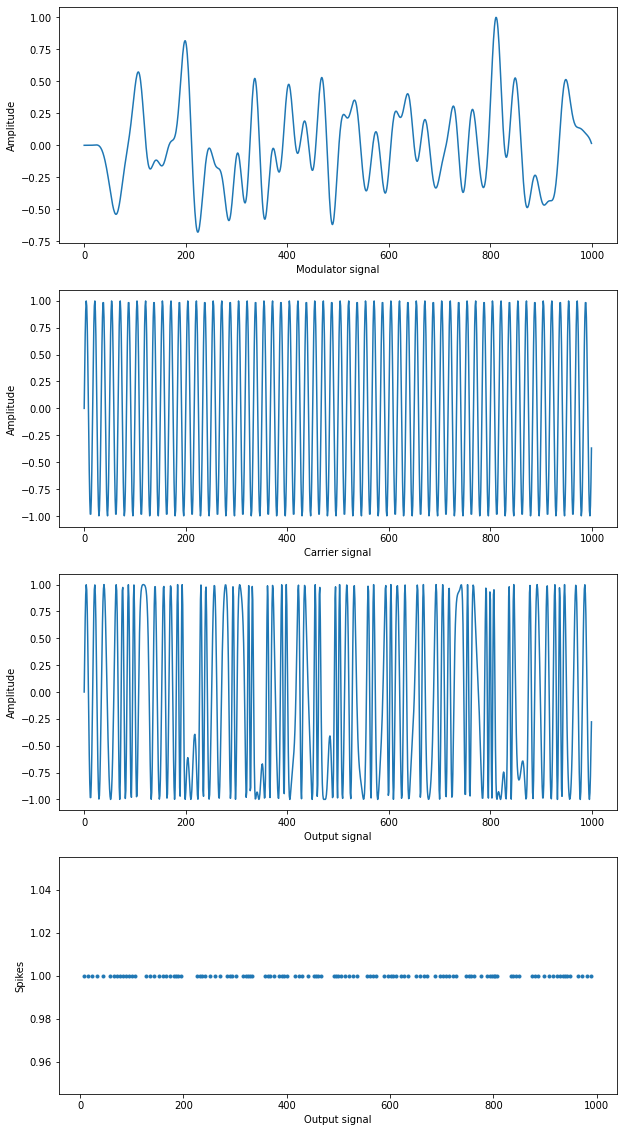

In [10]:
#Now we generate the spikes from our gaussian head direction signal

spikes = pulse_freq_modulation(head_signal_filtered, 60.0)

In [11]:

param = dyn1.Dynapse1Parameter("IF_DC_P",0,0) #250
model.update_single_parameter(param,0,0)

In [12]:
# get the fpga spike gen from Dynapse1Model
#spike_t_up = spike_t_up.tolist()
#print(spike_t_up.dtype)
#s = np.array([0.10110785, 0.11072627 ,0.1183185 , 0.12491149, 0.13090515 ,0.136508])
#s1 = spike_t_up[0:20]
#s2 = np.linspace(0,5,320)
sig = spikes /1000

fpga_spike_gen = model.get_fpga_spike_gen()

spikegen_id = 1
indices = [spikegen_id]*len(sig)

post_chip = chip_r
target_chips = [post_chip]*len(sig)

# set up the fpga_spike_gen
ut.set_fpga_spike_gen(fpga_spike_gen, sig , indices = indices, target_chips=target_chips, isi_base= 900, repeat_mode = False)

#INDICES SET TO ONE OF THE PFGA, NEED TO CONNECT ALL TO ONE

# remember to start the spikegen


In [13]:
#monitor neurons
monitored_global_nids_r = ut.get_global_id_list(neuron_ids_r)

#monitored_global_nids_r = [1]

# create a graph to monitor the spikes of these neurons
graph, filter_node, sink_node = ut.create_neuron_select_graph(model, monitored_global_nids_r)

#1 second 
duration = 1

# start monitor
graph.start()

# start the stimulus
fpga_spike_gen.start()
print("Starting Poisson spikegen for regular neurons")
#fpga_spike_gen.start()

# ------------ get events -----------
# clear the output buffer
sink_node.get_buf()

# sleep
time.sleep(duration)

# get the events accumulated during the past 2 sec
events = sink_node.get_buf()

# ------------ get events -----------

# stop the stimulus
fpga_spike_gen.stop()
print("Stopping Poisson spikegen for regular neurons")

# stop graph
graph.stop()


#timestamps of spikes
timestamps = []
frequencies = []

for i in range(num_neurons_r):
    neur_timestamps_id = i
    timestamps_one_neuron = []
    for evt in events:
        if (evt.neuron_id-start_neuron_id_r) == neur_timestamps_id:
            timestamps_one_neuron.append(evt.timestamp)

    frequency_one_neuron = len(timestamps_one_neuron)/duration
    print("Neuron {} timestamps: {}".format(i,timestamps_one_neuron))
    print("Spiking frequecy: {} Hz".format(frequency_one_neuron))

    timestamps.append(timestamps_one_neuron)
    frequencies.append(frequency_one_neuron)
'''
#monitor spikegen
spikegen_timestamps = []
for evt in events:
    spikegen_timestamps.append(evt.timestamp)

print("spikegen timestamps:  {}".format(spikegen_timestamps))
'''


Starting Poisson spikegen for regular neurons
Stopping Poisson spikegen for regular neurons
Neuron 0 timestamps: [1641013, 1649015, 1657017, 1666018, 1678015, 1691014, 1699018, 1705014, 1711014, 1717015, 1722015, 1728016, 1733017, 1740015, 1760015, 1768016, 1776015, 1785016, 1793015, 1799017, 1807015, 1814015, 1819014, 1823014, 1828014, 1860015, 1865015, 1870016, 1875014, 1884017, 1894011, 1903017, 1917016, 1923014, 1928015, 1934015, 1948016, 1954016, 1958017, 1962015, 1966020, 1991014, 1996016, 2001015, 2009017, 2019017, 2024014, 2028017, 2033017, 2050015, 2057015, 2063016, 2074017, 2085018, 2090015, 2094018, 2099018, 2125017, 2129016, 2133017, 2138017, 2145016, 2154012, 2161016, 2169013, 2188018, 2195015, 2200015, 2206016, 2221015, 2229018, 2234017, 2239019, 2245017, 2254018, 2261015, 2268018, 2283017, 2292015, 2298014, 2304019, 2321017, 2329014, 2335018, 2342017, 2348017, 2354016, 2361018, 2380018, 2385016, 2390014, 2395017, 2409018, 2421018, 2426016, 2430017, 2434015, 2437017, 2441

'\n#monitor spikegen\nspikegen_timestamps = []\nfor evt in events:\n    spikegen_timestamps.append(evt.timestamp)\n\nprint("spikegen timestamps:  {}".format(spikegen_timestamps))\n'

In [14]:
timestamps_original = np.copy(timestamps)

In [15]:
min_time = find_min_time(timestamps_original)
timestamps_preprocess = []
timestamps_ms = []

for timestamp in timestamps: 
    timestamps_preprocess.append(np.subtract(timestamp,min_time))
    timestamps_ms.append(np.subtract(timestamp,min_time)/1000)

(0.0, 100.0)

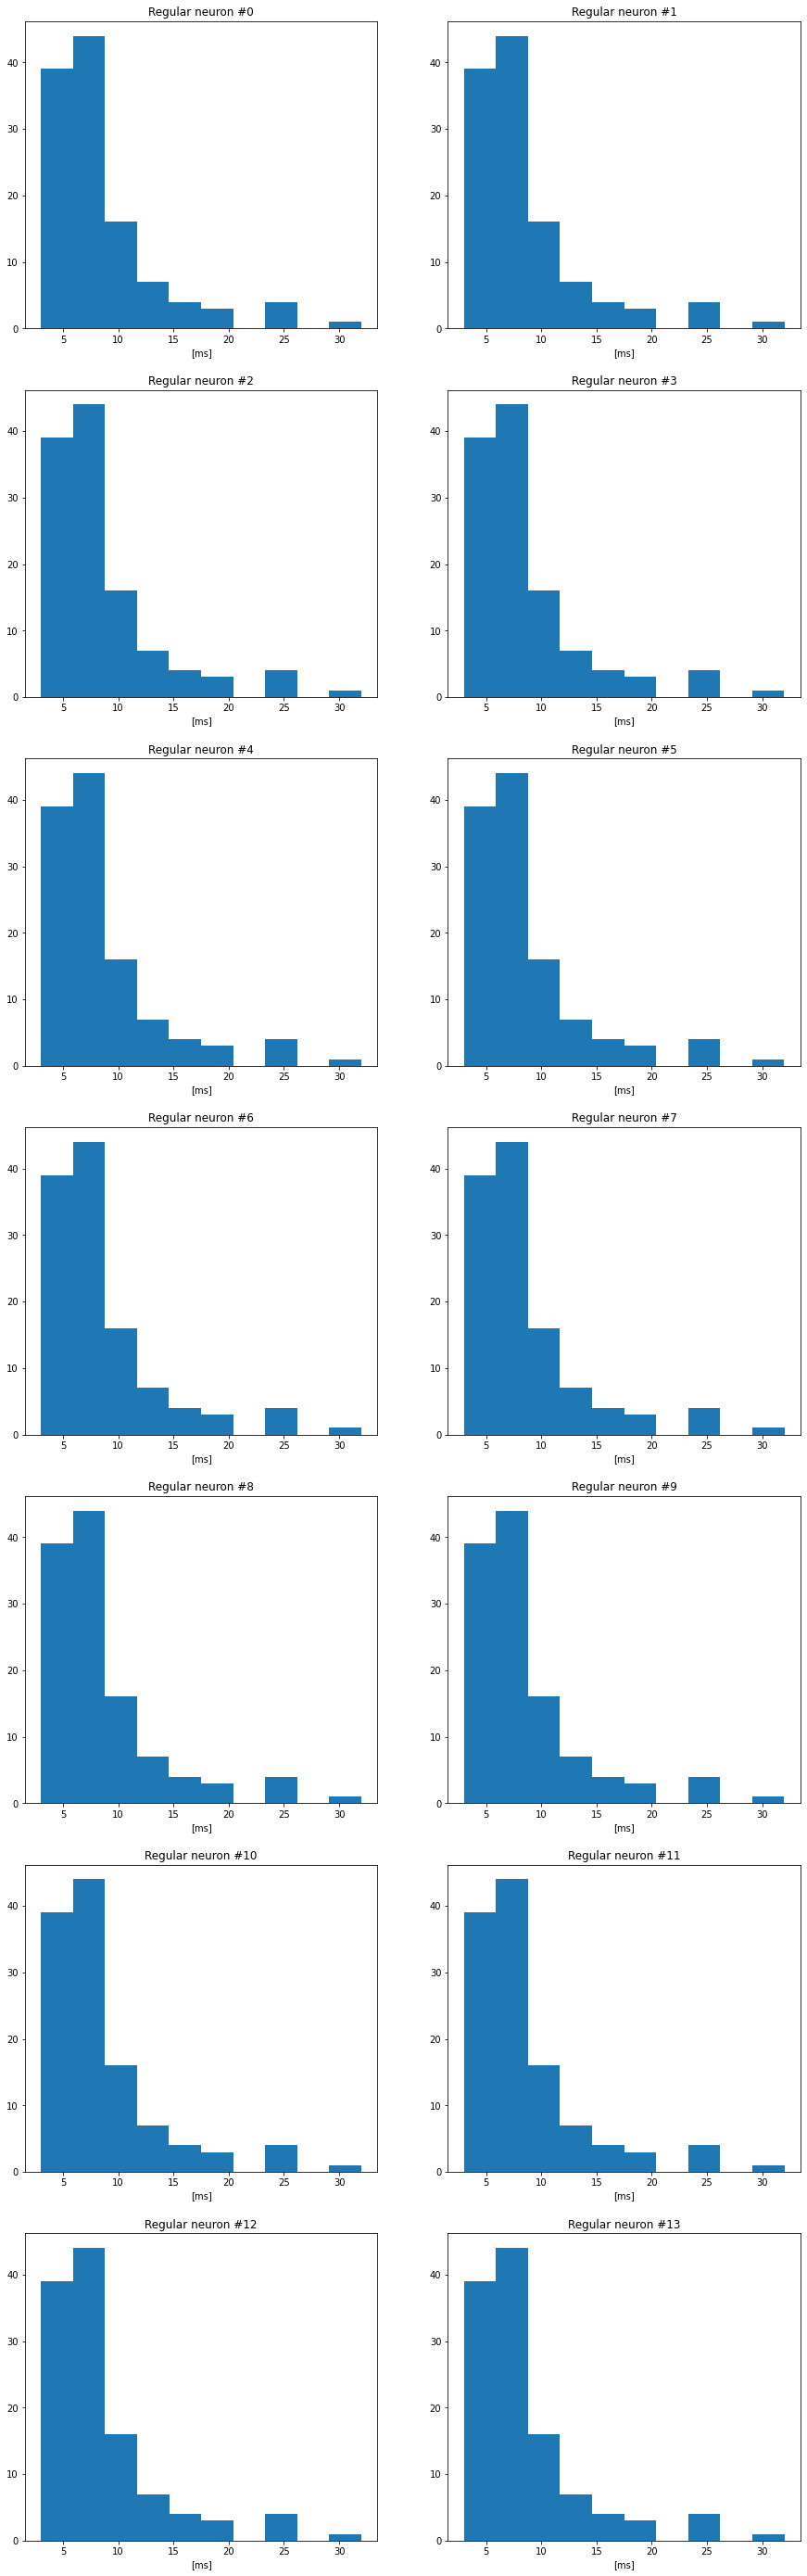

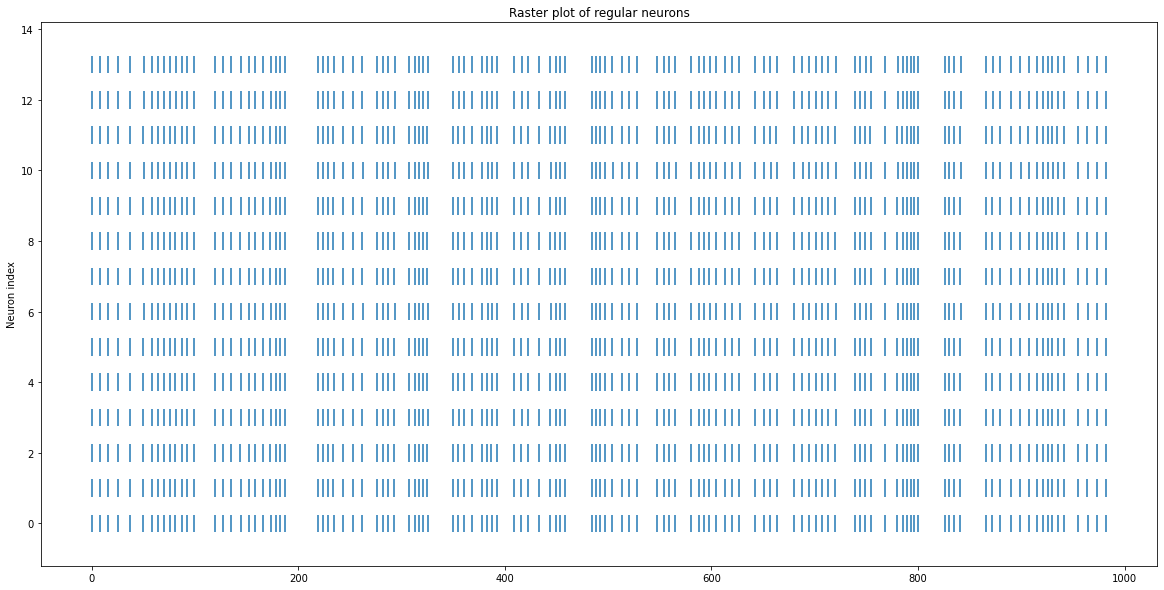

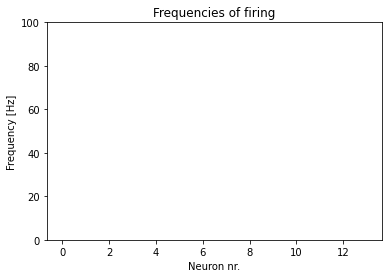

In [16]:

fig, axs = plt.subplots(7,2, sharex=True,figsize=(15,50),facecolor=(1, 1, 1))  
for i, ax in enumerate(axs.ravel()): 
    ax.set_title("Regular neuron #{}".format(i)) 
    ax.hist(isi_calc(timestamps_ms[i]))
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.set_xlabel("[ms]")
#plt.savefig("plots_regular/SDHistogram_{}.png".format(name_of_run))


plt.figure(figsize=(20,10),facecolor=(1, 1, 1))
plt.ylabel("Neuron index")
plt.title("Raster plot of regular neurons")
_ = plt.eventplot(timestamps_ms,linelengths=0.5)
#plt.savefig("plots_regular/SDRaster_{}.png".format(name_of_run))


plt.figure(facecolor=(1, 1, 1))
plt.plot(frequencies)
plt.title("Frequencies of firing")
plt.xlabel("Neuron nr.")
plt.ylabel("Frequency [Hz]")
plt.ylim(0,100)
#plt.savefig("plots_regular/SDFrequencies_{}.png".format(name_of_run))

In [17]:
# close Dynapse1
#ut.close_dynapse1(store, device_name)

In [18]:
def binary_signal(signal, recording_duration):
    """
    Given a spike train with the spike times, create a binary signal of spikes
    
    Args:
        signal (np.ndarray): array of spike times
        recording_duration (float): duration of time the recording has lasted in ms
        
    Returns: 
            bsignal (np.ndarray): time series of binary signal
    """
    bsignal = np.zeros((recording_duration,))
    bsignal[signal] = 1
    
    return bsignal

Text(0.5, 1.0, 'Input spikes')

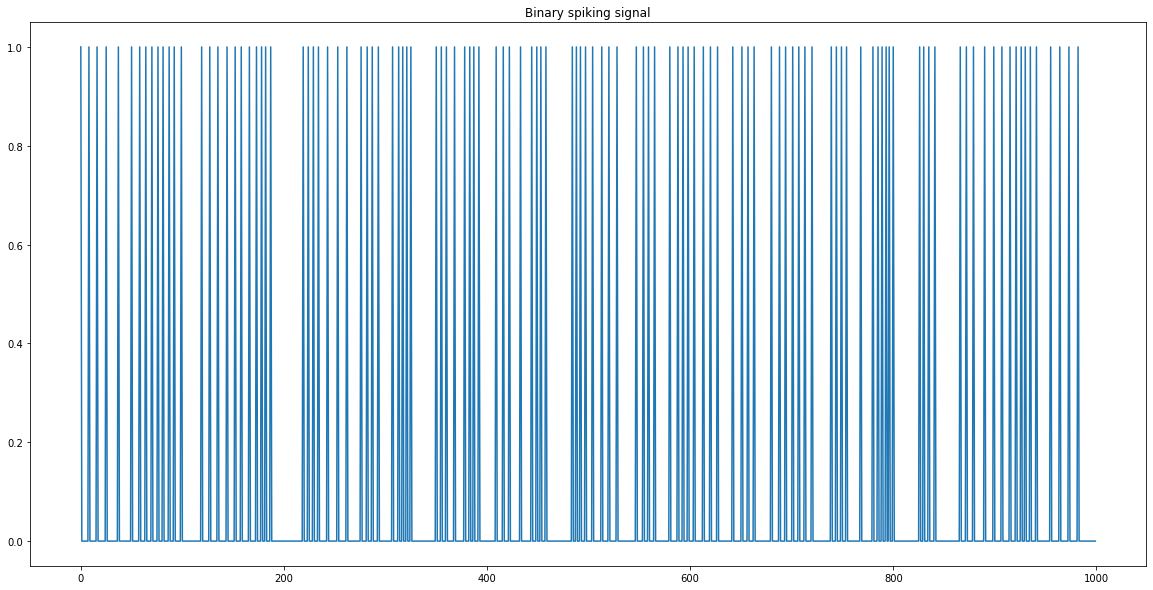

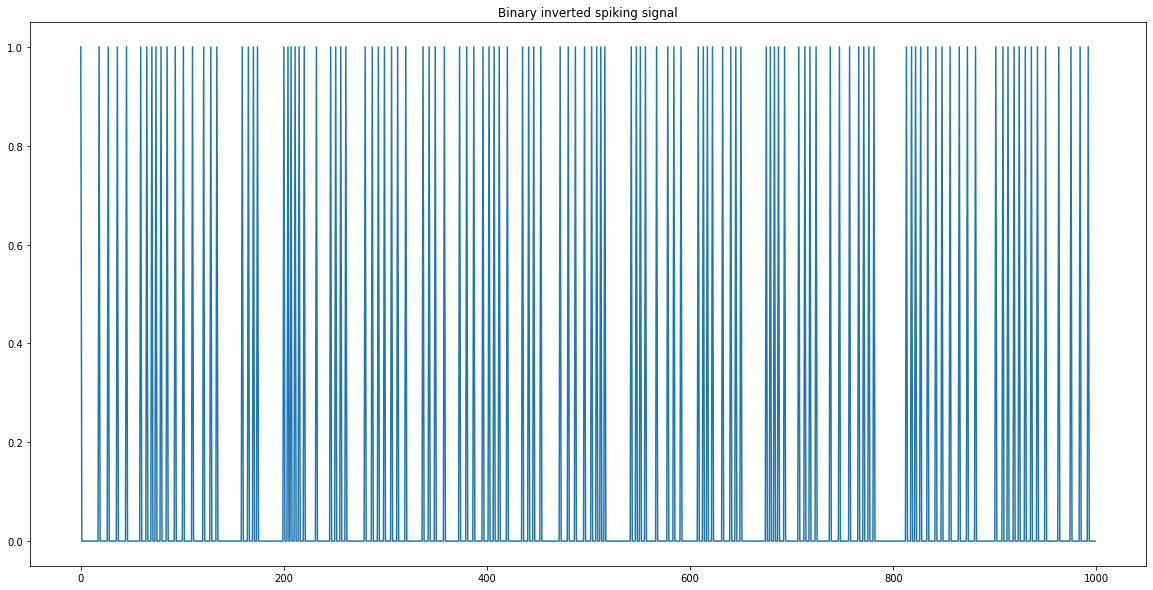

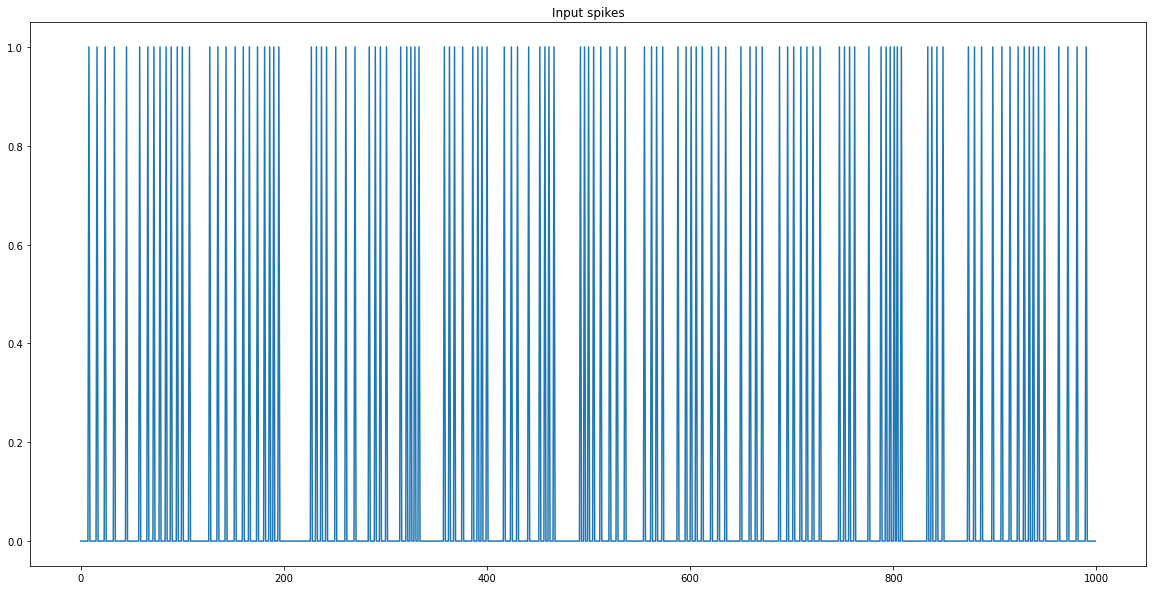

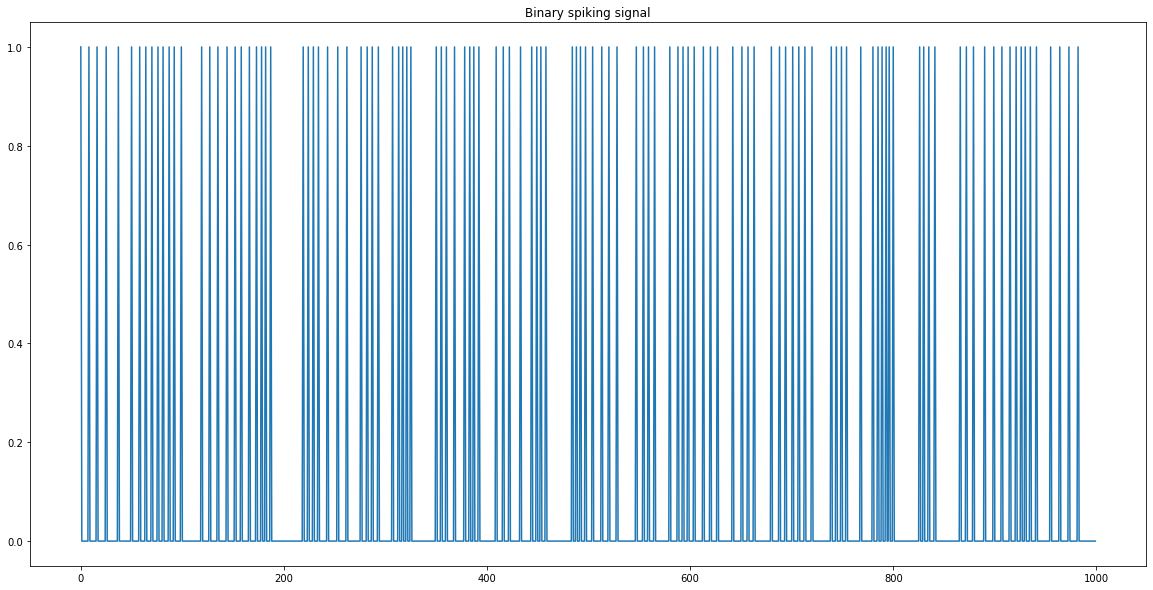

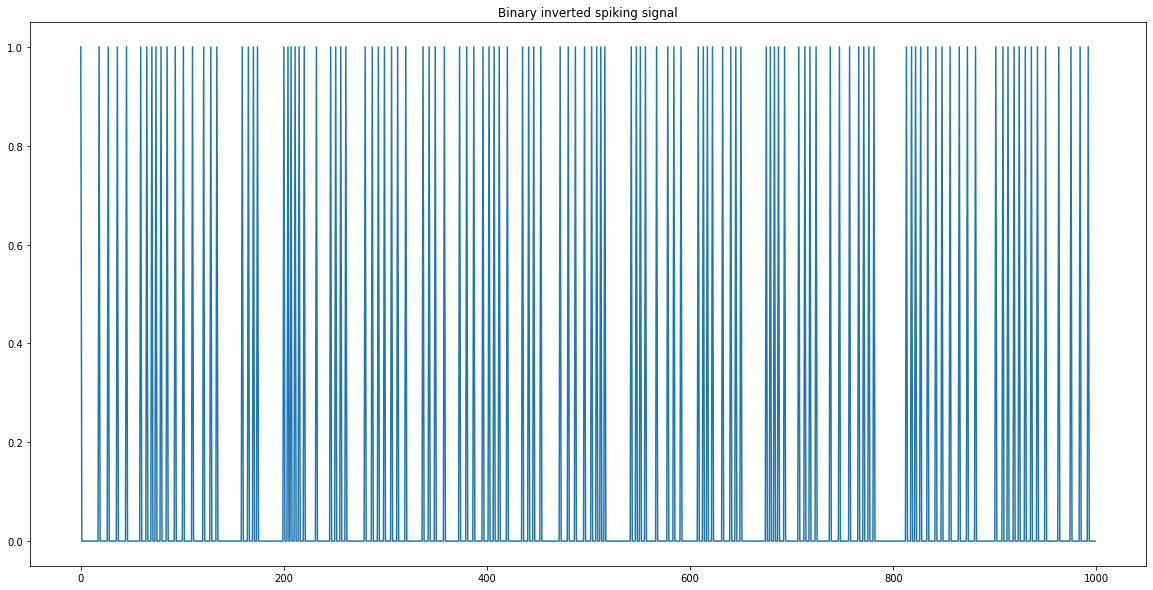

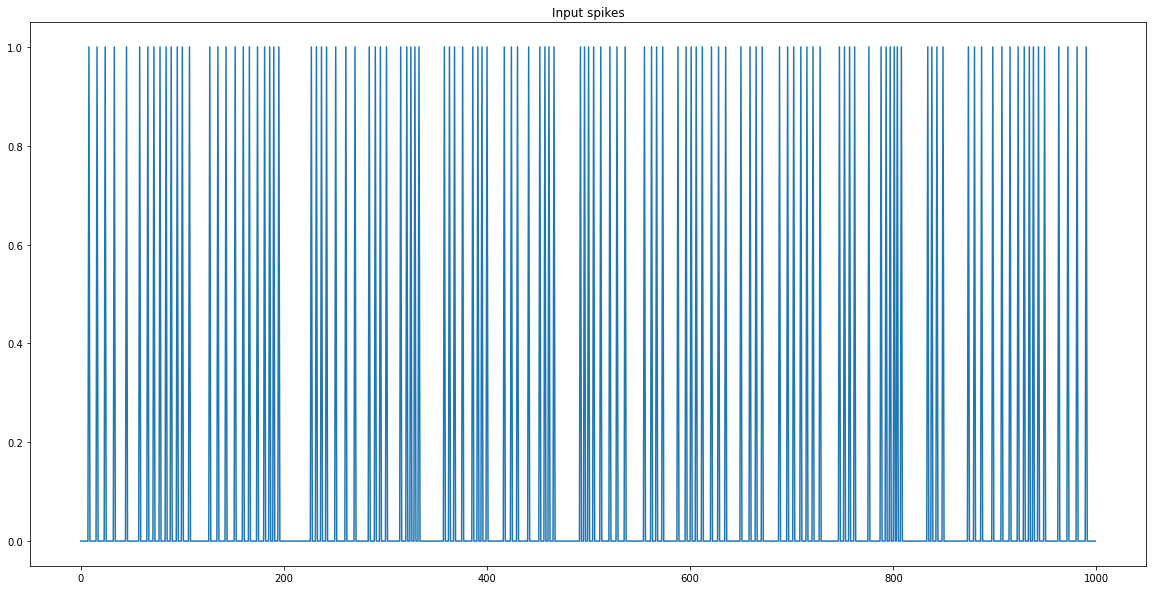

In [19]:
#we recorded the signal for 1000 micro s
recording_duration = 1000

#as a trial we will use the 0th neuron timestamp

spike_response = timestamps_ms[0]

#Now we wish to plot the spiking response inverted and non-inverted.

response = binary_signal(np.round(spike_response).astype(int),recording_duration)
response_flipped = binary_signal(np.round(-spike_response).astype(int),recording_duration)

plt.figure(figsize = (20,10))
plt.plot(response)
plt.title("Binary spiking signal")

plt.figure(figsize = (20,10))
plt.plot(response_flipped)
plt.title("Binary inverted spiking signal")

stimuli = binary_signal((spikes).astype(int), recording_duration)
plt.figure(figsize = (20,10))
plt.plot(stimuli)
plt.title("Input spikes")

#Now we wish to plot the spiking response inverted and non-inverted.

response = binary_signal(np.round(spike_response).astype(int),recording_duration)
response_flipped = binary_signal(np.round(-spike_response).astype(int),recording_duration)

plt.figure(figsize = (20,10))
plt.plot(response)
plt.title("Binary spiking signal")

plt.figure(figsize = (20,10))
plt.plot(response_flipped)
plt.title("Binary inverted spiking signal")

stimuli = binary_signal((spikes).astype(int), recording_duration)
plt.figure(figsize = (20,10))
plt.plot(stimuli)
plt.title("Input spikes")




In [20]:
def reconstruct_signal(response, response_flipped, stimuli):
    """
    Reconstructs the signal as shown in the neural variability paper, by convolving the spike train resposne with the
    kernel that minimizes the MSE.
    
    Args:
        response(np.ndarray): binary array contining the spikes
        response_flipped (np.ndarray): the flipped spike times (multiplied by -1)
        stimuli (np.ndarray): initial binary spike times
    
    Returns:
            signal_estimate(np.ndarray): vaues of the reconstructed signal esitmate
    """

    #Computes the stimulus-response cross spectrum (the functio takes the fourier transform of the signal)
    f_rs, Prs = signal.csd(response_flipped,stimuli,scaling = "spectrum", nperseg = 1000)
    plt.semilogy(f_rs, Prs)
    plt.plot()
    plt.title("Stimulus-response cross spectrum")

    
    #Computes the power spectrum of the response: note that when using the welch function, very different results are
    #observed. Uncomment it and comment out the periodgram to see.
    
    f_rr, Prr = signal.welch(response, nperseg=1000)  
    #f_rr, Prr = signal.periodogram(response,scaling = "spectrum")
    plt.figure()
    plt.semilogy(f_rr, Prr)
    plt.title("Output response power-spectrum")

    #Kernel in the fourier domain that minimizes the MSE
    K_fourier = Prs / Prr
    
    K_fourier_real = K_fourier.real
    
    plt.figure()
    plt.plot(K_fourier)
    plt.title("Fourier transform of the kernel")
    
    #Inverting the fourier transform to get the kernel for the convolution
    kernel = np.fft.ifft(K_fourier_real)
    kernel_real = np.real(kernel)
    
    plt.figure()
    plt.plot(kernel)
    plt.plot(kernel_real)
    plt.title("Reconstruction kernel")

    #signal estimate by convolving the spike responses with the kernal
    signal_estimate = np.convolve(response, kernel_real)

    plt.figure()
    plt.plot(signal_estimate)
    plt.title("Signal reconstruction")
    
    return signal_estimate, K_fourier_real, kernel, kernel_real





/home/nelose/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nelose/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nelose/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


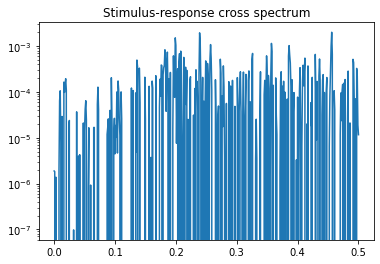

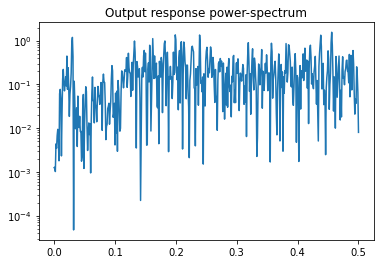

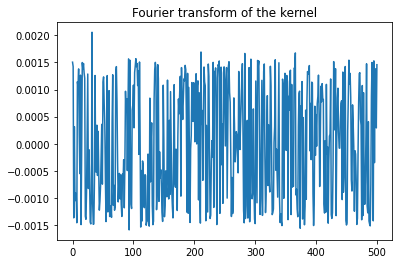

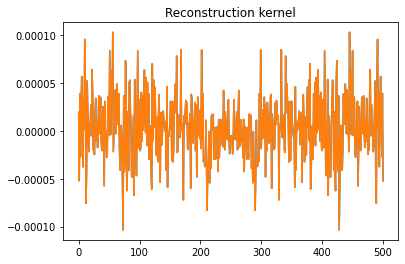

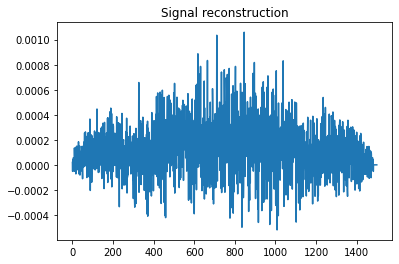

In [21]:
signal_reconstructed, K_fourier, kernel, kernel_real = reconstruct_signal(response, response_flipped, stimuli)

(1000,)


Text(0, 0.5, 'Amplitude (deg/s)')

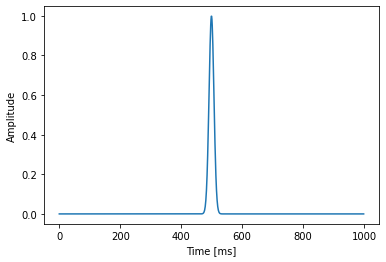

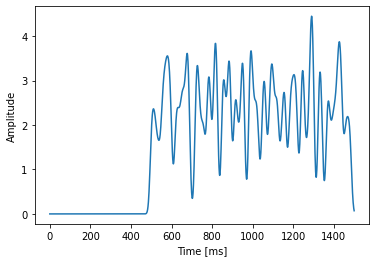

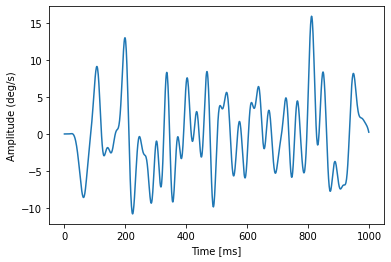

In [32]:
import scipy 
gauss = scipy.signal.gaussian(1000, 8, sym=True)
plt.plot(gauss)
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

print(gauss.shape)
recon = np.convolve(gauss,response)
plt.figure()
plt.plot(recon[0:1501])
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
#plt.figure()
#plt.plot(response)

plt.figure()
plt.plot(head_signal_filtered)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude (deg/s)")



In [24]:
#regular correlation for neuron 0

from scipy.stats import pearsonr

corr, _ = pearsonr(recon[500:1500], head_signal_filtered)
corr

-0.664220454236611

In [25]:
def normalize(signal, a, b):
      # solving system of linear equations one can find the coefficients
      A = np.min(signal)
      B = np.max(signal)
      C = (a-b)/(A-B)
      k = (C*A - a)/C
      return (signal-k)*C

0.7173157923234769


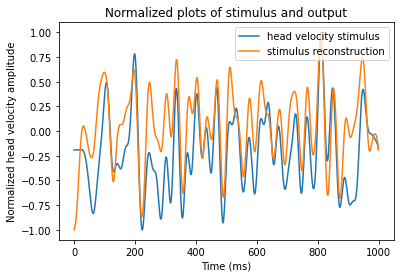

In [36]:
#regular neuron normalized correlation with shift

h_n = normalize(head_signal_filtered, -1, 1)
r_n = normalize(recon[480:1480], -1, 1)

corr_n, _ = pearsonr(r_n, h_n)
print(corr_n)

plt.plot(h_n, label = "head velocity stimulus")
plt.plot(r_n, label = "stimulus reconstruction")
plt.title("Normalized plots of stimulus and output")
plt.xlabel("Time (ms)")
plt.ylabel("Normalized head velocity amplitude")
plt.legend(loc = "upper right")

In [63]:
def coherence(stimulus, output):
    """
    Calculates the coherence of the stimulus and the output of the neurons
    
    Args:
        stimulus (np.ndarray): time series stimulus
        output (np.ndarray): time series output of neuron
        
    Return:
            coherence (np.ndarray): value of coherence of output and stimulus signal for different frequency values
    """
    #Calculate the stimulus-response cross spectrum
    frs, Prs = signal.csd(stimulus, output, nperseg = 1000)
    
    #Power spectrum of the spike train (output)
    #frr, Prr = signal.welch(output)
    
    frr, Prr = signal.periodogram(output)
    
    #Power spectrum of the stimulus
    #fss, Pss = signal.welch(stimulus)
    
    fss, Pss = signal.periodogram(stimulus)
    
    Cf = (np.abs(Prs)**2)/(Prr*Pss) #coherence values
    
    
    
    return Cf, frs, frr, fss, Prs, Pss, Prr

In [64]:
Cf, frs, frr, fss, Prs, Pss, Prr= coherence(h_n, r_n)
print("Mean coherence of stimulus and output is", np.mean(Cf))

Mean coherence of stimulus and output is 4.452412297484205e+56


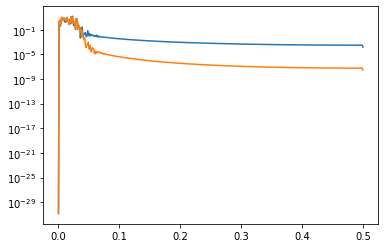

In [65]:
plt.semilogy(frr, Prr)
plt.semilogy(fss, Pss)

In [66]:
#use time bins to ocmpare spiking frequency of two signals

def compare_frequencies(signal_in, signal_out, nbins):
    """
    Partitions the signal into n time bins and computes the frequency in this binf or each of the signals.
    We have decided that it is sensible to set nbins to 101 (10 ms bins) for a duration of 1 second signal.
    """
    
    bin_indices = (np.linspace(0, signal_in.shape[0], nbins)).astype(int)
    
    bins_freq_in = np.zeros(bin_indices.shape[0]-1)
    bins_freq_out = np.copy(bins_freq_in)
    
    bins_freq_in_c = np.zeros(bin_indices.shape[0]-1)
    bins_freq_out_c = np.copy(bins_freq_in)
    
    dt = bin_indices[1]-bin_indices[0] #time interval in bin in ms
    
    dt_s = dt*1e-3 #time interval in seconds
    
    for idx in range (bin_indices.shape[0]-1):
        lower_bound = bin_indices[idx]
        upper_bound = bin_indices[idx+1]
        
        bins_freq_in[idx] = np.sum(signal_in[lower_bound:upper_bound])/dt_s
        bins_freq_out[idx] = np.sum(signal_out[lower_bound:upper_bound])/dt_s
        
        bins_freq_in_c[idx] = np.sum(signal_in[lower_bound:upper_bound])
        bins_freq_out_c[idx] = np.sum(signal_out[lower_bound:upper_bound])
        
    abs_freq_diff = np.abs(bins_freq_in-bins_freq_out)
    return bins_freq_in, bins_freq_out, bins_freq_in_c, bins_freq_out_c, abs_freq_diff


119.0
119.0


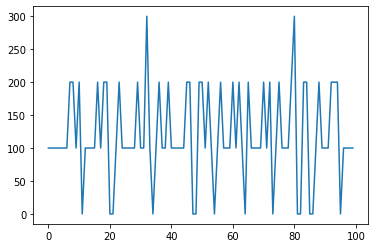

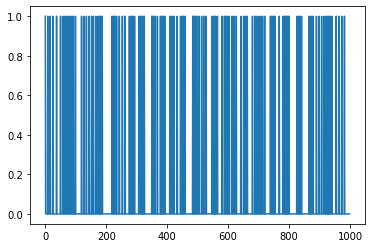

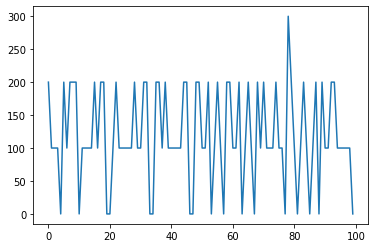

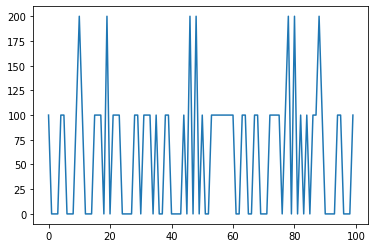

In [67]:
in_freq, out_freq,count_in, count_out, dif_freq = compare_frequencies(stimuli, response, 101)
plt.figure()
plt.plot(in_freq)
plt.figure()
plt.plot(response)
plt.figure()
plt.plot(out_freq)
plt.figure()
plt.plot(dif_freq)

print(np.sum(count_in))
print(np.sum(count_out))